In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Funciones de soporte
# -----------------------------------------------------------------------

from src import soporte as sp

In [2]:
# cargamos el csv obtenido de la fase de exploracion y limpieza
df = pd.read_csv("archivos/df_union.csv") 
print(f'Num. filas: {df.shape[0]}')
print(f'Num. columnas: {df.shape[1]}')

Num. filas: 403760
Num. columnas: 25


In [3]:
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2017,3,14,3,17,2533,253.0,438,36,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


# VISUALIZACION✨

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año? ✨

- Flights Booked -> cantidad de vuelos/mes -> int64 -> valor numérico continuo
- month -> mes acts vuelo -> int64 -> valores categóricos discretos
- year -> año acts vuelo -> int64 -> valores categóricos discretos

La manera mas clara de representar estos valores es con un grafico de barras (barplot)

In [4]:
# Agrupamos la cantidad de vuelos segun año y mes de todos los clientes
# groupby necesita que especifiquemos una accion -> en este caso, sum
# reset_index nos permite pasar de serie a df
df_flights = df.groupby(['year','month'])['flights_booked'].sum().reset_index()
df_flights

,year,month,flights_booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


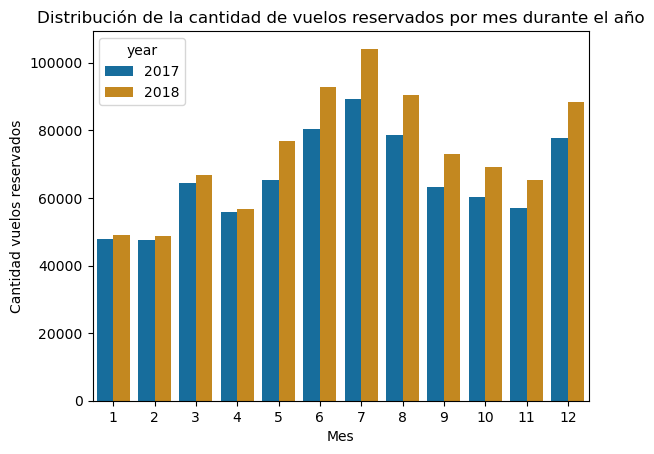

In [5]:
# Generamos grafico
sns.barplot(data=df_flights,
            x='month',
            y='flights_booked',
            hue='year', # agregamos una variable categorica mas
            palette='colorblind') # Diseñada para ser accesible a personas con deficiencias de visión en los colores.
plt.title('Distribución de la cantidad de vuelos reservados por mes durante el año')
plt.xlabel('Mes')
plt.ylabel('Cantidad vuelos reservados')

# Guardamos la grafica
plt.savefig("graficos_visualizacion/vuelos_mes_anio.jpg", bbox_inches = "tight", pad_inches=0.2);

El numero de reservas fue mayor en 2018, siendo los meses de mayor actividad los comprendidos entre mayo(5) y septiembre(9), con un pico en diciembre (12), coincidente con las vacaciones de verano y navidad respectivamente

2.¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente? ✨

- Distance -> distancia recorrida en el mes por el cliente -> valor numérico continuo
- Points Accumulated -> Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores -> valor numérico continuo

Al ser dos variables numericas podemos aplicar un grafico de regresion o regplot, el cual combina grafico de dispersion (scatterplot) con la linea de regresion lineal

En funcion de si es lineal o no podemos aplicar la correlacion de pearson (lineal) o correlacion de spearman (no lineal) para cuantificar la relación entre ambas

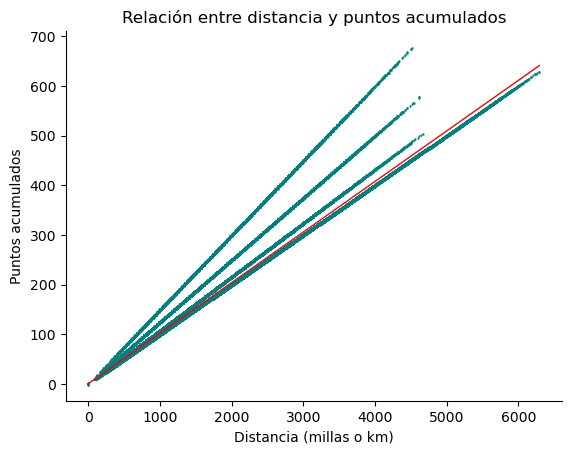

In [18]:
# Calculamos el grafico

sns.regplot(x = "distance", 
            y = "points_accumulated", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "red", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 0.80} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# nombres de los ejes 
plt.xlabel("Distancia (millas o km)")
plt.ylabel("Puntos acumulados")

# ponemos título a la gráfica
plt.title("Relación entre distancia y puntos acumulados")

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

# Guardamos la grafica
plt.savefig("graficos_visualizacion/relacion_distancia_puntos.jpg", bbox_inches = "tight", pad_inches=0.2);

- Puede apreciarse una relacion lineal positiva entre las variables, lo que indica que ambas variables se mueven en la misma dirección y, al incrementarse una, la otra también tiende a incrementarse
- Tiene sentido ya que los puntos acumulados aumentan en base a la distancia volada, por lo tanto, a mas distancia, mas puntos

# NOTA POST EVALUACION 🚨
- La diferenciacion entre las 4 lineas se debe a la diferencia acumulativa de puntos de cada tarjeta 

In [7]:
# Calculamos la correlación de Pearson al ser relacion lineal, se espera un valor proximo a 1

correlation = df['distance'].corr(df['points_accumulated']).round(2)
print(f"Coeficiente de correlación: {correlation}")

Coeficiente de correlación: 0.99


3. ¿Cuál es la distribución de los clientes por provincia o estado? ✨

province -> provincia o estado de residencia del cliente -> var categorica

Por el tipo de var podriamos utilizar un countplot o pieplot -> usaremos pieplot

In [8]:
# empezamos preparando los datos para poder hacer el pieplot usando un groupby. En este caso tendremos que contar el número de clientes que tenemos por provincia 
df_cliente_provincia = df.groupby("province")["loyalty_number"].count().reset_index()
df_cliente_provincia

,province,loyalty_number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


# NOTA POST EVALUACION 🚨
Aqui estoy haciendo el conteo del total de datos, no del total clientes, porque no le estoy pasando el valor unico por cliente -> repetir unificando por cliente tambien

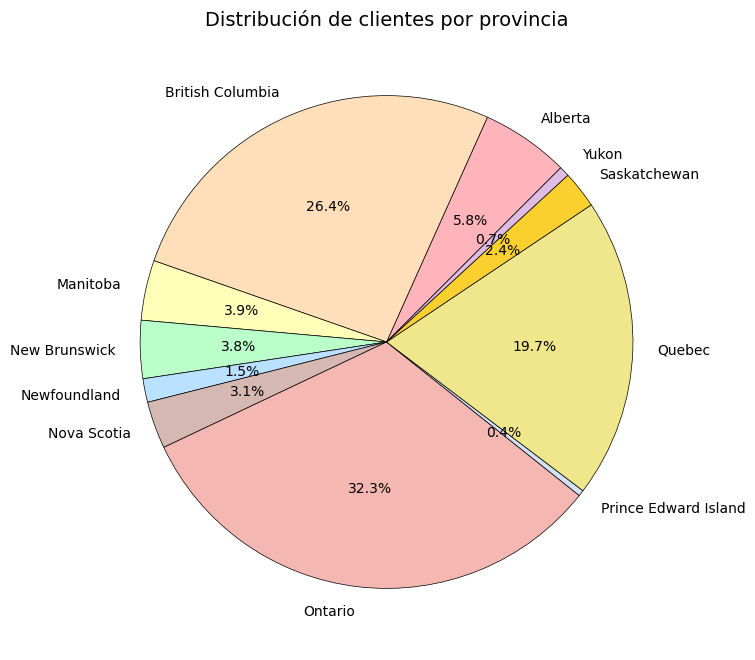

In [9]:
# Generamos el graficp con el df creado anteriormente 
plt.figure(figsize=(8,8))

colors = ["#FFB3BA", 
            "#FFDFBA",  
            "#FFFFBA",  
            "#BAFFC9",  
            "#BAE1FF", 
            "#D5B8B1", 
            "#F5B7B1", 
            "#D3E1F7",   
            "#F0E68C",  
            "#FAD02E",  
            "#E0BBE4" ] 

plt.pie("loyalty_number", labels= "province",
        data = df_cliente_provincia, 
        autopct=  '%1.1f%%', 
        colors = colors, 
        textprops={'fontsize': 10}, 
        startangle=45,
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})

plt.title('Distribución de clientes por provincia', fontsize=14);

# Guardamos la grafica
plt.savefig("graficos_visualizacion/distrib_clientes_provincia.jpg", bbox_inches = "tight", pad_inches=0.2);

Las provincias con mayor numero de clientes son Ontario y British Columnia, los cuales abarcan mas del 50% de los clientes (32.3% y 26.4% respectivamente)

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?✨

- salary -> salario anual cliente -> valor numerico continuo
- education -> Nivel educativo alcanzado por el cliente -> var categorica

Utilizaremos un grafico de barras (barplot)

In [10]:
# Agrupamos el campo eduacion y calculamos el promedio del salario para cada nivel educativo de los clientes
# groupby necesita que especifiquemos una accion -> en este caso, el promedio (media)
# reset_index nos permite pasar de serie a df
df_salary_education = df.groupby('education')['salary'].mean().reset_index().round(2)
df_salary_education

,education,salary
0,Bachelor,72599.08
1,College,73455.00
2,Doctor,178403.68
3,High School or Below,61146.38
4,Master,103734.52


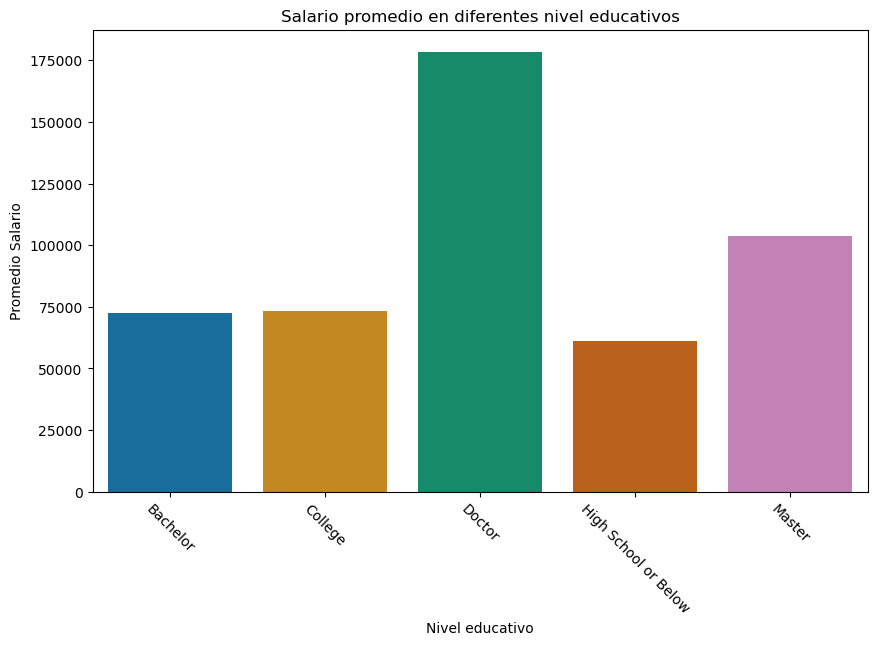

In [11]:
# Generamos grafico
plt.figure(figsize=(10,6))

sns.barplot(data=df_salary_education,
            x='education',
            y='salary',
            palette='colorblind') # Diseñada para ser accesible a personas con deficiencias de visión en los colores.
plt.title('Salario promedio en diferentes nivel educativos')
plt.xlabel('Nivel educativo')
plt.ylabel('Promedio Salario')
plt.xticks(rotation=-45)

# Guardamos la grafica
plt.savefig("graficos_visualizacion/salario_promedio_educacion.jpg", bbox_inches = "tight", pad_inches=0.2);

- El salario promedio de los clientes con doctorado destaca considerablemente con respecto a los demas
- El salario promedio de los clientes con master es superior al resto pero esta mas cerca de los rangos inferiores que de los clientes con doctorado
- No existen diferencias relevantes en los salarios de los clientes que tienen un nivel bachelor, college, high school o menor

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? ✨

Loyalty Card -> tarjeta de lealtad que posee el cliente -> var categorica

Usaremos un pieplot

In [12]:
# empezamos preparando los datos para poder hacer el pieplot usando un groupby. En este caso tendremos que contar el número de clientes que tenemos con diferentes tipos de tarjeta de fidelidas
df_cliente_tarjeta = df.groupby("loyalty_card")["loyalty_number"].count().reset_index()
df_cliente_tarjeta

,loyalty_card,loyalty_number
0,Aurora,83132
1,Nova,136883
2,Star,183745


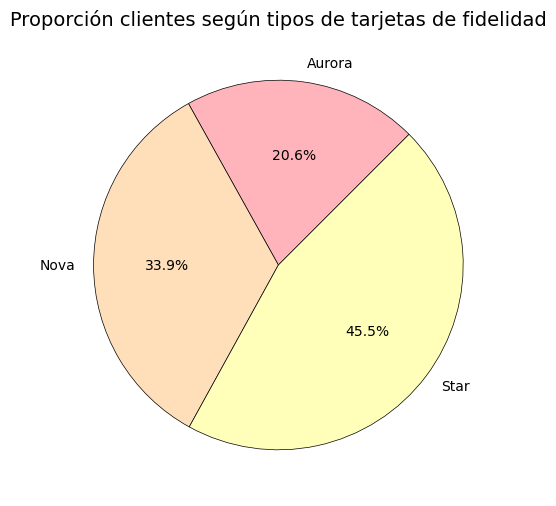

In [13]:
# Generamos el graficp con el df creado anteriormente 
plt.figure(figsize=(6,6))

colors = ["#FFB3BA", 
            "#FFDFBA",  
            "#FFFFBA" ] 

plt.pie("loyalty_number", labels= "loyalty_card",
        data = df_cliente_tarjeta, 
        autopct=  '%1.1f%%', 
        colors = colors, 
        textprops={'fontsize': 10}, 
        startangle=45,
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})

plt.title('Proporción clientes según tipos de tarjetas de fidelidad', fontsize=14);

# Guardamos la grafica
plt.savefig("graficos_visualizacion/distrib_clientes_tarjetas.jpg", bbox_inches = "tight", pad_inches=0.2);

Cerca del 50% de los clientes tienen una tarjeta de fidelidad tipo Star (45.5%), dividiendose el resto entre Nova y Aurora, siendo Nova ligeramente superior (34%)

6. ¿Cómo se distribuyen los clientes según su estado civil y género? ✨

- marital_status -> estado civil cliente -> var categorica
- gender -> genero cliente -> var categorica

Utilizaremos un countplot


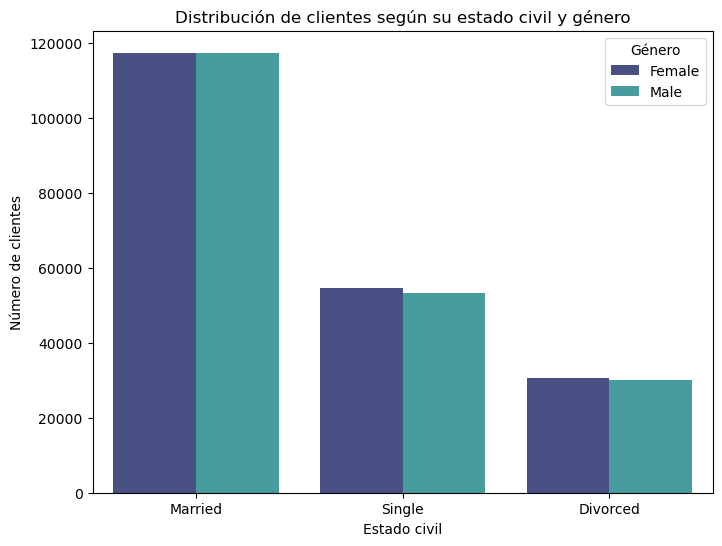

In [14]:
plt.figure(figsize=(8,6))

sns.countplot(x="marital_status", hue="gender", data=df, dodge=True, palette="mako")

# Añadir título y etiquetas
plt.title("Distribución de clientes según su estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")
plt.legend(title='Género')

# Guardamos la grafica
plt.savefig("graficos_visualizacion/distrib_clientes_estado_civil_genero.jpg", bbox_inches = "tight", pad_inches=0.2);

In [15]:
# Obtenemos los valores numericos 
# Agrupar por 'Marital Status' y 'Gender', y contar los registros
# size() cuenta el número de registros (clientes) para cada combinación de estado civil y género
df_clientes_estado_civil_genero = df.groupby(['marital_status', 'gender']).size().reset_index(name='Conteo clientes').sort_values(by='Conteo clientes', ascending=False)

df_clientes_estado_civil_genero


,marital_status,gender,Conteo clientes
3,Married,Male,117482
2,Married,Female,117363
4,Single,Female,54760
5,Single,Male,53393
0,Divorced,Female,30634
1,Divorced,Male,30128


- Algo mas del 50% de los clientes son casados, diviendose el resto de clientes entre solteros y divorciados, sienta esta la menor proporcion.
- Los valores se distribuyen de manera homogena entre hombres y mujeres